Demonstration of CVAE as in Doersch's tutorial.

In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from simple_fc import Encoder,Decoder
from cvae import Conditional_Variational_Autoencoder
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Middle column

In [3]:
tf.reset_default_graph()

In [4]:
#Training

#sess = tf.InteractiveSession()
#build_encoder = Encoder(100)
#build_decoder = Decoder(100)
#model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
#                                            z_dim = 20,img_dim = 784,dataset = mnist.train,
#                                            learning_rate = 0.001, num_epochs = 50,
#                                           get_cond_info = get_middle_column, cond_info_dim = 28,
#                                           checkpoint_name = 'cvae_middle_column')
#model.train()

In [5]:
# Load checkpoint
sess = tf.InteractiveSession()
build_encoder = Encoder(100)
build_decoder = Decoder(100)
model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
                                            z_dim = 20,img_dim = 784,dataset = mnist.train,
                                            learning_rate = 0.001, num_epochs = 50,
                                           get_cond_info = get_middle_column, cond_info_dim = 28,
                                           load = True, load_file = 'checkpoints/cvae_middle_column')

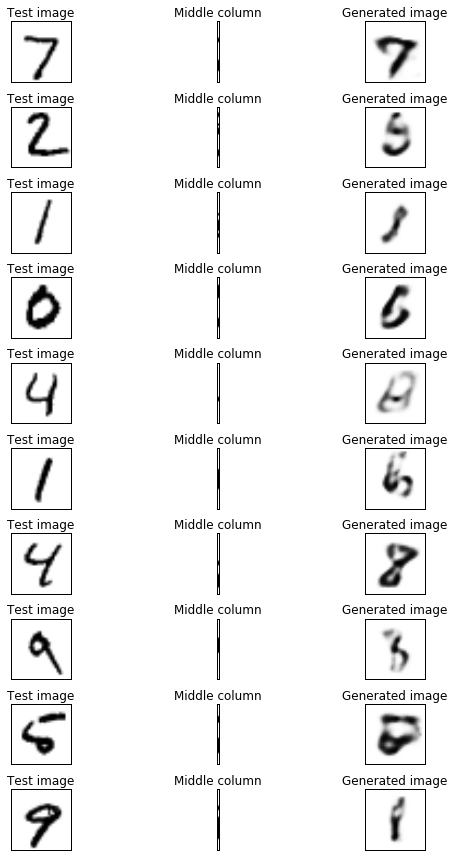

In [6]:
images, _ = mnist.test.next_batch(100)
info = get_middle_column(images)
generated_images = model.generate(num=100, info=info)

num_show = 10
fig = plt.figure(figsize=(8,12))
for i in xrange(num_show):
    plt.subplot(num_show, 3, 3*i+1)
    plt.imshow(images[i,].reshape(28, 28), cmap='gray_r')
    plt.title('Test image')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_show, 3, 3*i+2)
    plt.imshow(info[i,].reshape(28,1), cmap='gray_r')
    plt.title('Middle column')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_show, 3, 3*i+3)
    plt.imshow(generated_images[i,].reshape(28,28), cmap='gray_r')
    plt.title('Generated image')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('images/middle_column')
plt.show()

In [7]:
sess.close()
tf.reset_default_graph()

# Left half

In [8]:
# Training
#sess = tf.InteractiveSession()
#build_encoder = Encoder(100)
#build_decoder = Decoder(100)
#model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
#                                            z_dim = 20,img_dim = 784,dataset = mnist.train,
#                                            learning_rate = 0.001, num_epochs = 50,
#                                           get_cond_info = get_left_half, cond_info_dim = 392,
#                                           checkpoint_name = 'cvae_left_half_checkpoint')
#model.train()

In [9]:
# Load checkpoint
sess = tf.InteractiveSession()
build_encoder = Encoder(100)
build_decoder = Decoder(100)
model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
                                            z_dim = 20,img_dim = 784,dataset = mnist.train,
                                            learning_rate = 0.001, num_epochs = 50,
                                           get_cond_info = get_left_half, cond_info_dim = 392,
                                           load = True, load_file = 'checkpoints/cvae_left_half_checkpoint')

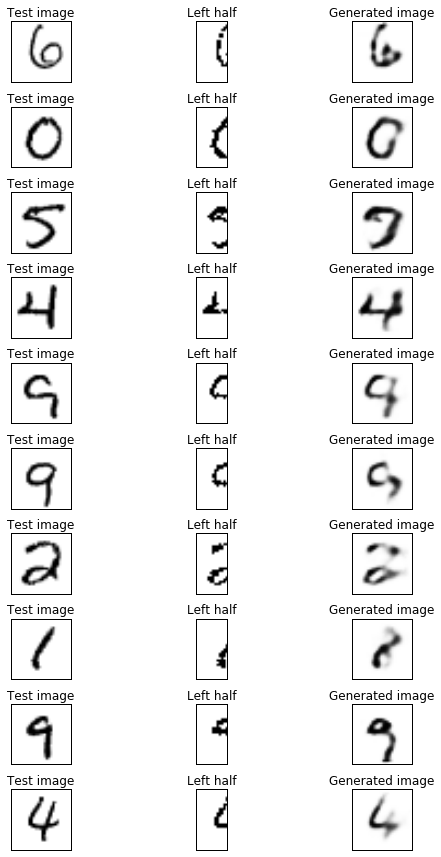

In [10]:
images, _ = mnist.test.next_batch(100)
info = get_left_half(images)
generated_images = model.generate(num=100, info=info)

num_show = 10
plt.figure(figsize=(8,12))
for i in xrange(num_show):
    plt.subplot(num_show, 3, 3*i+1)
    plt.imshow(images[i,].reshape(28, 28), cmap='gray_r')
    plt.title('Test image')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_show, 3, 3*i+2)
    plt.imshow(info[i,].reshape(28,14), cmap='gray_r')
    plt.title('Left half')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_show, 3, 3*i+3)
    plt.imshow(generated_images[i,].reshape(28,28), cmap='gray_r')
    plt.title('Generated image')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('images/left_half')
plt.show()

In [11]:
sess.close()
tf.reset_default_graph()

# Label

In [12]:
# Training
#sess = tf.InteractiveSession()
#build_encoder = Encoder(100)
#build_decoder = Decoder(100)
#model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
#                                            z_dim = 20,img_dim = 784,dataset = mnist.train,
#                                            learning_rate = 0.001, num_epochs = 50,
#                                           condition_on_label=True,
#                                            checkpoint_name = 'cvae_label_checkpoint')
#model.train()

In [13]:
# Load checkpoint
sess = tf.InteractiveSession()
build_encoder = Encoder(100)
build_decoder = Decoder(100)
model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
                                            z_dim = 20,img_dim = 784,dataset = mnist.train,
                                            learning_rate = 0.001, num_epochs = 50,
                                           condition_on_label=True,
                                            load = True, load_file = 'checkpoints/cvae_label_checkpoint')

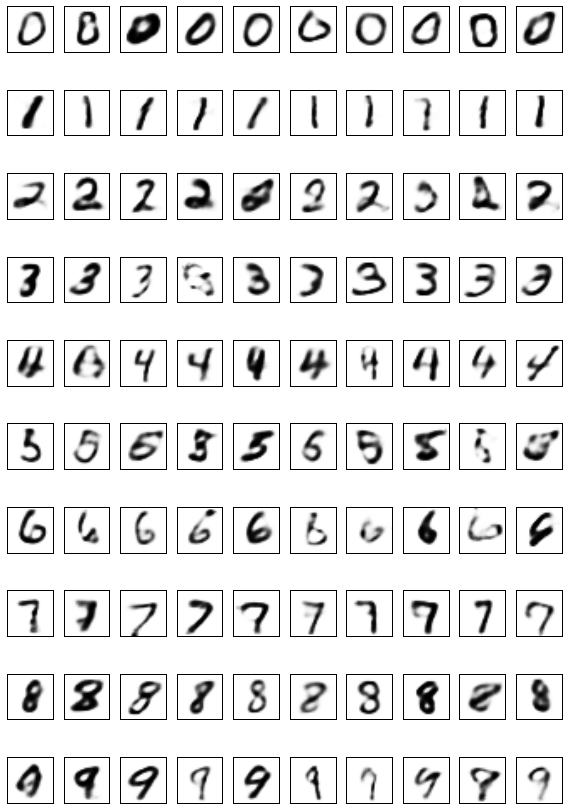

In [14]:
#images, info = mnist.test.next_batch(100)
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info)

num_show = 5
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.savefig('images/by_label')
plt.show()

In [15]:
sess.close()
tf.reset_default_graph()